# Data Exploration of BankChurners data Part 1

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
df = pd.read_csv('BankChurners.csv')

del df['CLIENTNUM']
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

df.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [4]:
def stdize(col):
    return (col-np.mean(col))/np.std(col, ddof=1)

# Relation of Client data to attrition

## Age distribution of Clients

In [5]:
attr_age = df.groupby(['Attrition_Flag', 'Customer_Age']).size()
attr_age = attr_age.unstack('Attrition_Flag').fillna(0)
attr_age['Frac_Attr'] = attr_age['Attrited Customer']/(attr_age['Attrited Customer'] + attr_age['Existing Customer'])
attr_age['Frac_Exis'] = attr_age['Existing Customer']/(attr_age['Attrited Customer'] + attr_age['Existing Customer'])
attr_age.head(10)

Attrition_Flag,Attrited Customer,Existing Customer,Frac_Attr,Frac_Exis
Customer_Age,,,,
26,6.0,72.0,0.076923,0.923077
27,3.0,29.0,0.093750,0.906250
28,1.0,28.0,0.034483,0.965517
29,7.0,49.0,0.125000,0.875000
30,15.0,55.0,0.214286,0.785714
31,13.0,78.0,0.142857,0.857143
32,17.0,89.0,0.160377,0.839623
33,20.0,107.0,0.157480,0.842520
34,19.0,127.0,0.130137,0.869863


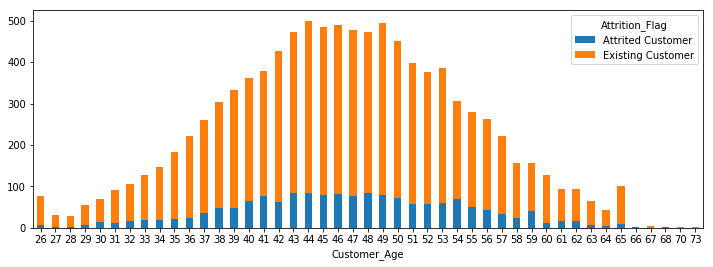

In [6]:
attr_age[['Attrited Customer', 'Existing Customer']].plot(figsize=(12,4), kind='bar', stacked=True, rot=0)

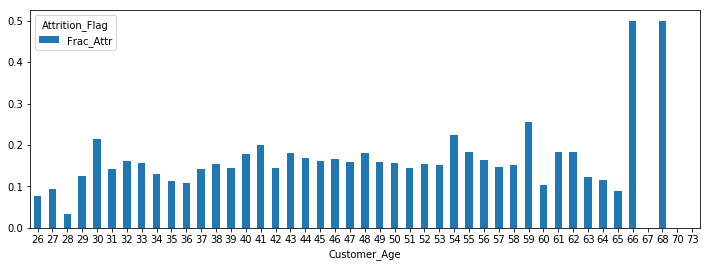

In [7]:
attr_age[['Frac_Attr']].plot(figsize=(12,4), kind='bar', rot=0)

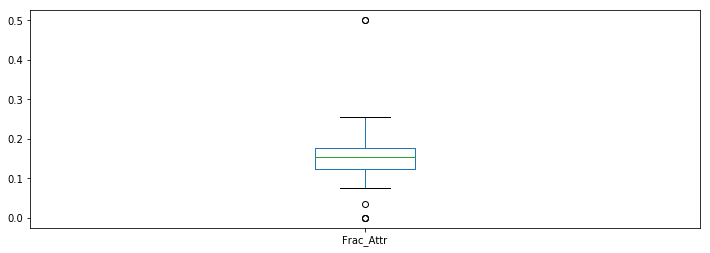

In [8]:
attr_age[['Frac_Attr']].plot(figsize=(12,4), kind='box', rot=0)

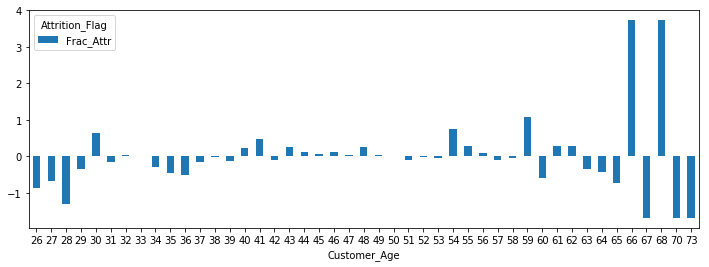

In [9]:
stdize(attr_age[['Frac_Attr']]).plot(figsize=(12,4), kind='bar', rot=0)

Text(0,0.5,'Client count')

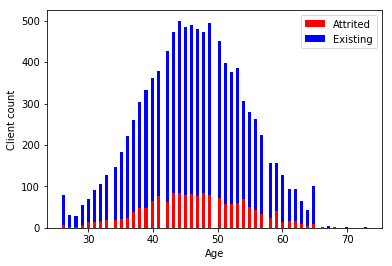

In [10]:
attr_cust = df.Customer_Age[df.Attrition_Flag=='Attrited Customer']
ex_cust = df.Customer_Age[df.Attrition_Flag=='Existing Customer']

plt.hist([attr_cust, ex_cust], bins=100, stacked=True, color=['r', 'b'], label=['Attrited','Existing'])
plt.legend({'Attrited': 'r', 'Existing': 'b'})

plt.xlabel('Age')
plt.ylabel('Client count')

## Education level and Attrition

In [11]:
attr_educ = df.groupby(['Attrition_Flag', 'Education_Level']).size()
educ_keys = ['Uneducated',
             'High School',
             'Unknown',
             'College',
             'Graduate',
             'Post-Graduate',
             'Doctorate']
attr_educ = attr_educ.unstack('Education_Level')[educ_keys]
attr_educ.stack()

Attrition_Flag     Education_Level
Attrited Customer  Uneducated          237
                   High School         306
                   Unknown             256
                   College             154
                   Graduate            487
                   Post-Graduate        92
                   Doctorate            95
Existing Customer  Uneducated         1250
                   High School        1707
                   Unknown            1263
                   College             859
                   Graduate           2641
                   Post-Graduate       424
                   Doctorate           356
dtype: int64

In [12]:
attr_educ = attr_educ.stack().unstack('Attrition_Flag').fillna(0)
attr_educ['Frac_Attr'] = attr_educ['Attrited Customer']/(attr_educ['Attrited Customer'] + attr_educ['Existing Customer'])
attr_educ['Frac_Exis'] = attr_educ['Existing Customer']/(attr_educ['Attrited Customer'] + attr_educ['Existing Customer'])
attr_educ

Attrition_Flag,Attrited Customer,Existing Customer,Frac_Attr,Frac_Exis
Education_Level,,,,
Uneducated,237,1250,0.159381,0.840619
High School,306,1707,0.152012,0.847988
Unknown,256,1263,0.168532,0.831468
College,154,859,0.152024,0.847976
Graduate,487,2641,0.155691,0.844309
Post-Graduate,92,424,0.178295,0.821705
Doctorate,95,356,0.210643,0.789357


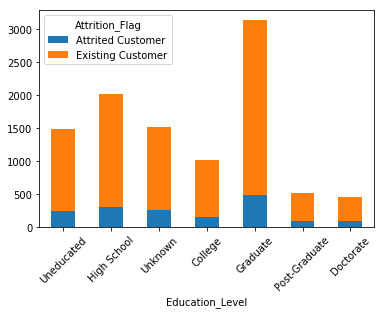

In [13]:
attr_educ[['Attrited Customer', 'Existing Customer']].plot(kind='bar', stacked=True, rot=45)

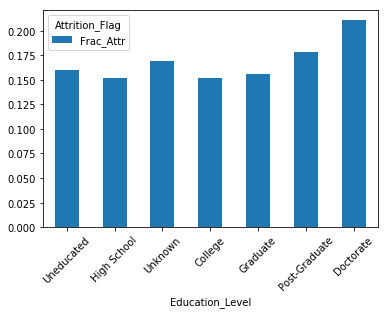

In [14]:
attr_educ[['Frac_Attr']].plot(kind='bar', rot=45)

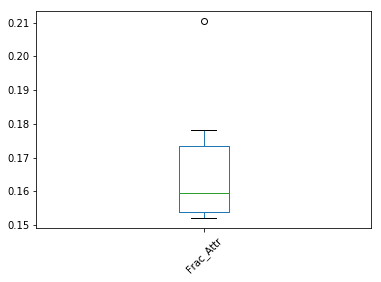

In [15]:
attr_educ[['Frac_Attr']].plot(kind='box', rot=45)

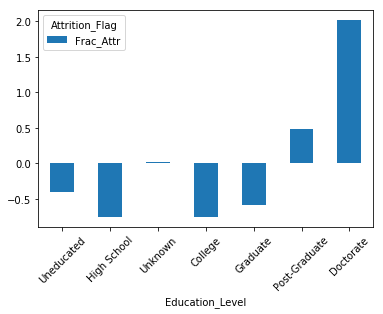

In [16]:
stdize(attr_educ[['Frac_Attr']]).plot(kind='bar', rot=45)

## Marital status and Attrition

In [17]:
attr_mar = df.groupby(['Attrition_Flag', 'Marital_Status']).size()
attr_mar = attr_mar.unstack('Attrition_Flag')
attr_mar['Frac_Attr'] = attr_mar['Attrited Customer']/(attr_mar['Attrited Customer'] + attr_mar['Existing Customer'])
attr_mar['Frac_Exis'] = attr_mar['Existing Customer']/(attr_mar['Attrited Customer'] + attr_mar['Existing Customer'])
attr_mar

Attrition_Flag,Attrited Customer,Existing Customer,Frac_Attr,Frac_Exis
Marital_Status,,,,
Divorced,121,627,0.161765,0.838235
Married,709,3978,0.151269,0.848731
Single,668,3275,0.169414,0.830586
Unknown,129,620,0.172230,0.827770


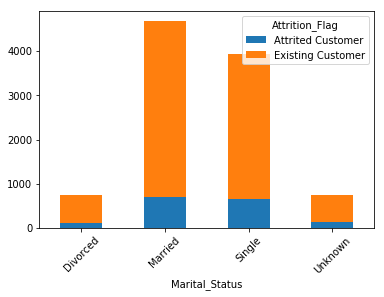

In [18]:
attr_mar[['Attrited Customer', 'Existing Customer']].plot(kind='bar', stacked=True, rot=45)

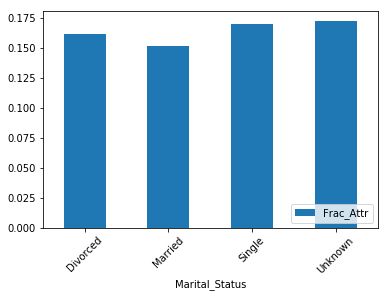

In [19]:
attr_mar[['Frac_Attr']].plot(kind='bar', rot=45)
plt.legend(loc='lower right')

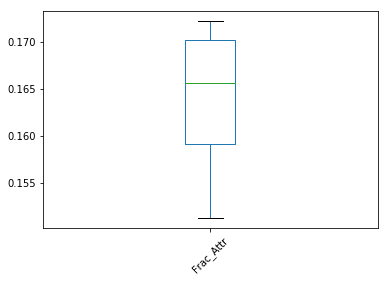

In [20]:
attr_mar[['Frac_Attr']].plot(kind='box', rot=45)

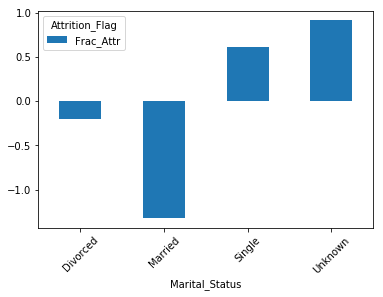

In [21]:
stdize(attr_mar[['Frac_Attr']]).plot(kind='bar', rot=45)

## Is card category  related to annual income?

In [22]:
income_keys = ['Less than $40K',
               '$40K - $60K',
               'Unknown',
               '$60K - $80K',
               '$80K - $120K',
               '$120K +']
#income_dict = dict(zip(income_keys, [i for i in range(len(income_keys))]))
#df['Income_Category'] = df['Income_Category'].map(income_dict)

In [23]:
card_cat =  df.groupby(['Income_Category', 'Card_Category']).size()
card_cat = card_cat.unstack('Income_Category')[income_keys]
card_cat.stack()

Card_Category  Income_Category
Blue           Less than $40K     3403
               $40K - $60K        1675
               Unknown            1045
               $60K - $80K        1273
               $80K - $120K       1395
               $120K +             645
Gold           Less than $40K       24
               $40K - $60K          15
               Unknown               9
               $60K - $80K          29
               $80K - $120K         21
               $120K +              18
Platinum       Less than $40K        4
               $40K - $60K           1
               Unknown               5
               $60K - $80K           4
               $80K - $120K          2
               $120K +               4
Silver         Less than $40K      130
               $40K - $60K          99
               Unknown              53
               $60K - $80K          96
               $80K - $120K        117
               $120K +              60
dtype: int64

In [24]:
card_cat = card_cat.stack().unstack('Card_Category')

card_keys = ['Blue', 'Silver', 'Gold', 'Platinum']
card_cat = card_cat[card_keys]
card_cat

Card_Category,Blue,Silver,Gold,Platinum
Income_Category,,,,
Less than $40K,3403,130,24,4
$40K - $60K,1675,99,15,1
Unknown,1045,53,9,5
$60K - $80K,1273,96,29,4
$80K - $120K,1395,117,21,2
$120K +,645,60,18,4


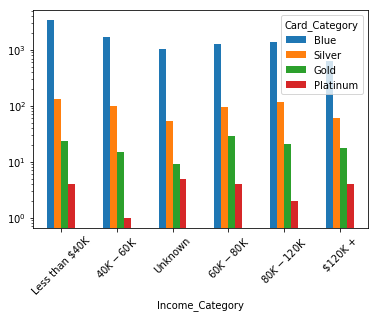

In [25]:
card_cat[['Blue', 'Silver', 'Gold', 'Platinum']].plot(kind='bar', logy=True, rot=45)

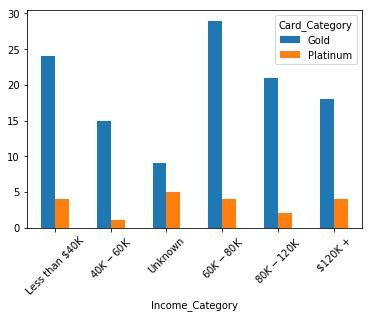

In [26]:
card_cat[['Gold', 'Platinum']].plot(kind='bar', rot=45)

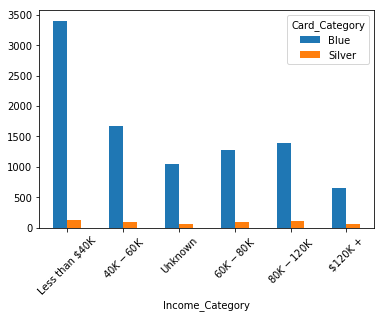

In [27]:
card_cat[['Blue', 'Silver']].plot(kind='bar', rot=45)

In [28]:
# calculate % of custemers having a card type for each income category
# normalization over columns
card_cat['frac_B'] = card_cat['Blue']/(card_cat['Blue']+card_cat['Silver']+card_cat['Gold']+card_cat['Platinum'])
card_cat['frac_S'] = card_cat['Silver']/(card_cat['Blue']+card_cat['Silver']+card_cat['Gold']+card_cat['Platinum'])
card_cat['frac_G'] = card_cat['Gold']/(card_cat['Blue']+card_cat['Silver']+card_cat['Gold']+card_cat['Platinum'])
card_cat['frac_P'] = card_cat['Platinum']/(card_cat['Blue']+card_cat['Silver']+card_cat['Gold']+card_cat['Platinum'])

card_cat_frac = card_cat
del card_cat_frac['Blue']
del card_cat_frac['Silver']
del card_cat_frac['Gold']
del card_cat_frac['Platinum']
card_cat_frac

Card_Category,frac_B,frac_S,frac_G,frac_P
Income_Category,,,,
Less than $40K,0.955630,0.036507,0.006740,0.001123
$40K - $60K,0.935754,0.055307,0.008380,0.000559
Unknown,0.939748,0.047662,0.008094,0.004496
$60K - $80K,0.907989,0.068474,0.020685,0.002853
$80K - $120K,0.908795,0.076221,0.013681,0.001303
$120K +,0.887208,0.082531,0.024759,0.005502


## Is card category related to credit card limit?

In [29]:
card_lim = df.groupby(['Card_Category', 'Credit_Limit']).size()
card_lim.head()

Card_Category  Credit_Limit
Blue           1438.3          507
               1439.0            2
               1440.0            1
               1441.0            2
               1442.0            1
dtype: int64

In [30]:
card_lim = card_lim.unstack('Card_Category').fillna(0)
card_lim.head()

Card_Category,Blue,Gold,Platinum,Silver
Credit_Limit,,,,
1438.3,507.0,0.0,0.0,0.0
1439.0,2.0,0.0,0.0,0.0
1440.0,1.0,0.0,0.0,0.0
1441.0,2.0,0.0,0.0,0.0
1442.0,1.0,0.0,0.0,0.0


In [31]:
card_keys = ['Blue', 'Silver', 'Gold', 'Platinum']
card_lim = card_lim[card_keys]
card_lim.head(20)

Card_Category,Blue,Silver,Gold,Platinum
Credit_Limit,,,,
1438.3,507.0,0.0,0.0,0.0
1439.0,2.0,0.0,0.0,0.0
1440.0,1.0,0.0,0.0,0.0
1441.0,2.0,0.0,0.0,0.0
1442.0,1.0,0.0,0.0,0.0
1443.0,3.0,0.0,0.0,0.0
1446.0,1.0,0.0,0.0,0.0
1449.0,2.0,0.0,0.0,0.0
1451.0,2.0,0.0,0.0,0.0


In [32]:
card_lim.tail(20)

Card_Category,Blue,Silver,Gold,Platinum
Credit_Limit,,,,
33779.0,0.0,1.0,0.0,0.0
33791.0,1.0,1.0,0.0,0.0
33864.0,1.0,0.0,0.0,0.0
33870.0,1.0,0.0,0.0,0.0
33874.0,0.0,1.0,0.0,0.0
33889.0,0.0,1.0,0.0,0.0
33905.0,0.0,1.0,0.0,0.0
33913.0,1.0,0.0,0.0,0.0
33951.0,1.0,0.0,0.0,0.0


In [33]:
card_lim[(card_lim.Gold != 0) & (card_lim.Platinum != 0)]

Card_Category,Blue,Silver,Gold,Platinum
Credit_Limit,,,,
15987.0,0.0,0.0,14.0,4.0
23981.0,0.0,0.0,11.0,1.0
34516.0,198.0,221.0,74.0,15.0


In [34]:
card_lim[(card_lim.Gold != 0) | (card_lim.Platinum != 0)]

Card_Category,Blue,Silver,Gold,Platinum
Credit_Limit,,,,
3735.0,9.0,1.0,1.0,0.0
6224.0,8.0,2.0,1.0,0.0
7469.0,9.0,0.0,1.0,0.0
14938.0,5.0,1.0,1.0,0.0
15016.0,0.0,0.0,1.0,0.0
15109.0,0.0,0.0,1.0,0.0
15164.0,0.0,1.0,1.0,0.0
15261.0,0.0,0.0,1.0,0.0
15365.0,0.0,0.0,1.0,0.0


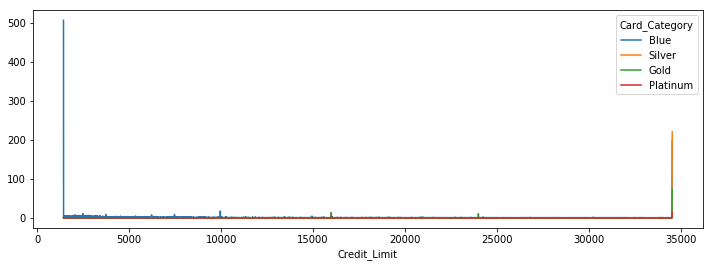

In [35]:
card_lim.plot(figsize=(12,4), rot=0)

In [36]:
card_cat_lim = df[['Card_Category', 'Credit_Limit']]

blue = card_cat_lim[card_cat_lim['Card_Category']=='Blue'].Credit_Limit
silver = card_cat_lim[card_cat_lim['Card_Category']=='Silver'].Credit_Limit
gold = card_cat_lim[card_cat_lim['Card_Category']=='Gold'].Credit_Limit
platinum = card_cat_lim[card_cat_lim['Card_Category']=='Platinum'].Credit_Limit

In [37]:
blue.value_counts().head()

1438.3     507
34516.0    198
9959.0      18
2490.0      11
3735.0       9
Name: Credit_Limit, dtype: int64

Text(0,0.5,'Client count')

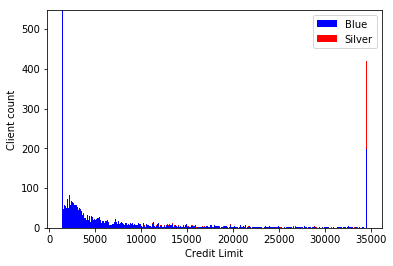

In [38]:
plt.hist([blue, silver], bins=1000, stacked=True, color=['b', 'r'], label=['Blue', 'Silver']) #, density=True)
plt.legend({'Blue': 'b', 'Silver': 'r'})

#plt.yscale('log')
plt.xlabel('Credit Limit')
plt.ylabel('Client count')

Text(0,0.5,'Client count')

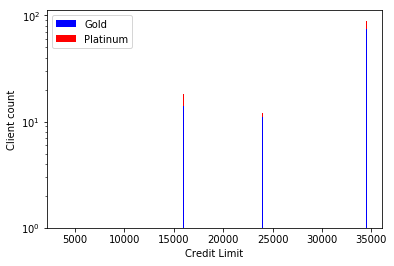

In [39]:
plt.hist([gold, platinum], bins=1000, stacked=True, color=['b', 'r'], label=['Gold', 'Platinum']) #, density=True)
plt.legend({'Gold': 'b', 'Platinum': 'r'})

plt.yscale('log')
plt.xlabel('Credit Limit')
plt.ylabel('Client count')

Text(0,0.5,'Client count')

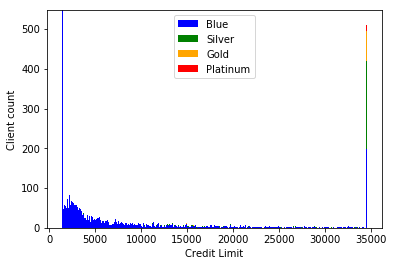

In [40]:
plt.hist([blue, silver, gold, platinum], bins=1000, stacked=True, color=['b', 'g', 'orange', 'r'], label=['Blue', 'Silver', 'Gold', 'Platinum'])
plt.legend({'Blue': 'b', 'Silver': 'g', 'Gold': 'orange', 'Platinum': 'r'})

plt.xlabel('Credit Limit')
plt.ylabel('Client count')

## Income category and Attrition

In [41]:
attr_inc = df.groupby(['Attrition_Flag', 'Income_Category']).size()
income_keys = ['Less than $40K',
               '$40K - $60K',
               'Unknown',
               '$60K - $80K',
               '$80K - $120K',
               '$120K +']
attr_inc = attr_inc.unstack('Income_Category').fillna(0)[income_keys]
attr_inc.stack()

Attrition_Flag     Income_Category
Attrited Customer  Less than $40K      612
                   $40K - $60K         271
                   Unknown             187
                   $60K - $80K         189
                   $80K - $120K        242
                   $120K +             126
Existing Customer  Less than $40K     2949
                   $40K - $60K        1519
                   Unknown             925
                   $60K - $80K        1213
                   $80K - $120K       1293
                   $120K +             601
dtype: int64

In [42]:
attr_inc = attr_inc.stack().unstack('Attrition_Flag').fillna(0)
attr_inc['Frac_Attr'] = attr_inc['Attrited Customer']/(attr_inc['Attrited Customer'] + attr_inc['Existing Customer'])
attr_inc['Frac_Exis'] = attr_inc['Existing Customer']/(attr_inc['Attrited Customer'] + attr_inc['Existing Customer'])
attr_inc.head(10)

Attrition_Flag,Attrited Customer,Existing Customer,Frac_Attr,Frac_Exis
Income_Category,,,,
Less than $40K,612,2949,0.171862,0.828138
$40K - $60K,271,1519,0.151397,0.848603
Unknown,187,925,0.168165,0.831835
$60K - $80K,189,1213,0.134807,0.865193
$80K - $120K,242,1293,0.157655,0.842345
$120K +,126,601,0.173315,0.826685


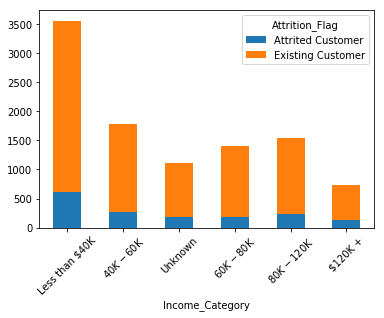

In [43]:
attr_inc[['Attrited Customer', 'Existing Customer']].plot(kind='bar', stacked=True, rot=45)

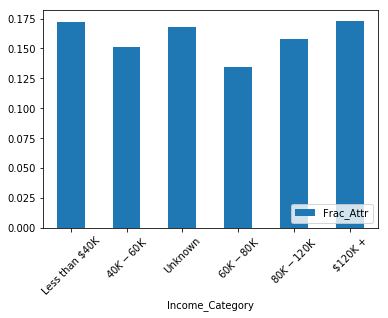

In [44]:
attr_inc[['Frac_Attr']].plot(kind='bar', rot=45)
plt.legend(loc='lower right')

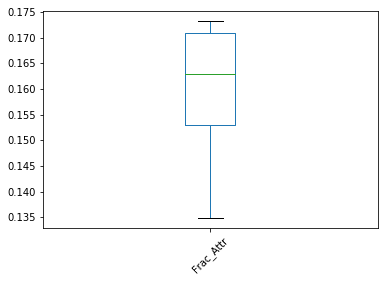

In [45]:
attr_inc[['Frac_Attr']].plot(kind='box', rot=45)

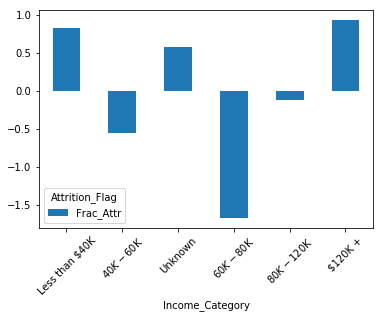

In [46]:
stdize(attr_inc[['Frac_Attr']]).plot(kind='bar', rot=45)

## Card category and Attrition

In [47]:
attr_card = df.groupby(['Attrition_Flag', 'Card_Category']).size()
attr_card = attr_card.unstack('Card_Category').fillna(0)

card_keys = ['Blue', 'Silver', 'Gold', 'Platinum']
attr_card = attr_card[card_keys] 
attr_card

Card_Category,Blue,Silver,Gold,Platinum
Attrition_Flag,,,,
Attrited Customer,1519,82,21,5
Existing Customer,7917,473,95,15


In [48]:
attr_card.stack()

Attrition_Flag     Card_Category
Attrited Customer  Blue             1519
                   Silver             82
                   Gold               21
                   Platinum            5
Existing Customer  Blue             7917
                   Silver            473
                   Gold               95
                   Platinum           15
dtype: int64

In [49]:
attr_card = attr_card.stack().unstack('Attrition_Flag').fillna(0)
attr_card['Frac_Attr'] = attr_card['Attrited Customer']/(attr_card['Attrited Customer'] + attr_card['Existing Customer'])
attr_card['Frac_Exis'] = attr_card['Existing Customer']/(attr_card['Attrited Customer'] + attr_card['Existing Customer'])
attr_card.head(10)

Attrition_Flag,Attrited Customer,Existing Customer,Frac_Attr,Frac_Exis
Card_Category,,,,
Blue,1519,7917,0.160979,0.839021
Silver,82,473,0.147748,0.852252
Gold,21,95,0.181034,0.818966
Platinum,5,15,0.250000,0.750000


In [50]:
df.groupby(['Card_Category']).size()

Card_Category
Blue        9436
Gold         116
Platinum      20
Silver       555
dtype: int64

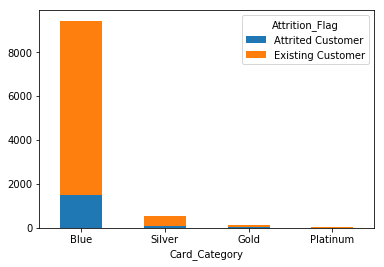

In [51]:
attr_card[['Attrited Customer', 'Existing Customer']].plot(kind='bar', stacked=True, rot=0)

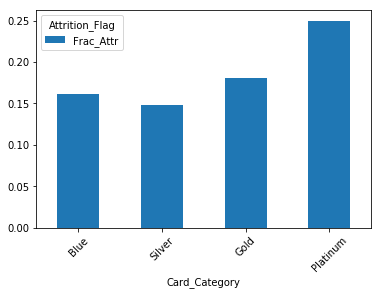

In [52]:
attr_card[['Frac_Attr']].plot(kind='bar', rot=45)

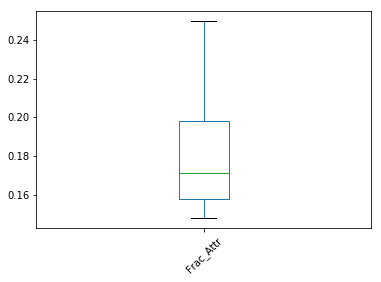

In [53]:
attr_card[['Frac_Attr']].plot(kind='box', rot=45)

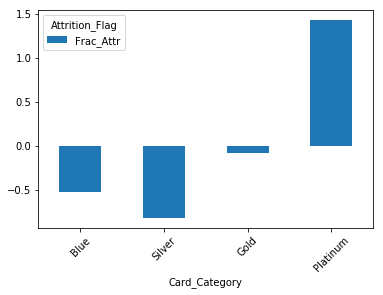

In [54]:
stdize(attr_card[['Frac_Attr']]).plot(kind='bar', rot=45)